In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json

with open('learning_curve.json', 'r') as fp:
    data = json.load(fp)
    data = data['data']
    
smalls = 4
revisions = 6

# Results for nell

[0.004637000000000002, 0.004637000000000002, 0.004637000000000002, 0.004637000000000002, 0.004637000000000002, 0.004637000000000002]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


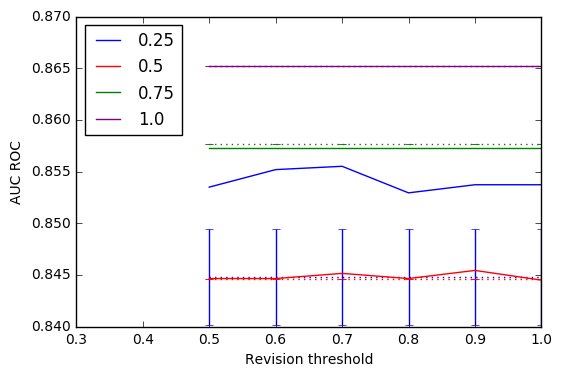

[0.010705500000000034, 0.010705500000000034, 0.010705500000000034, 0.010705500000000034, 0.010705500000000034, 0.010705500000000034]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


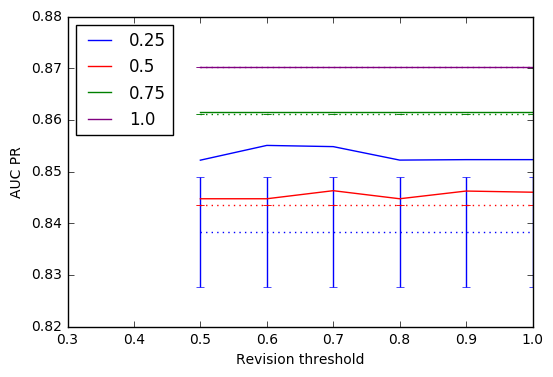

[0.003023999999999971, 0.003023999999999971, 0.003023999999999971, 0.003023999999999971, 0.003023999999999971, 0.003023999999999971]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


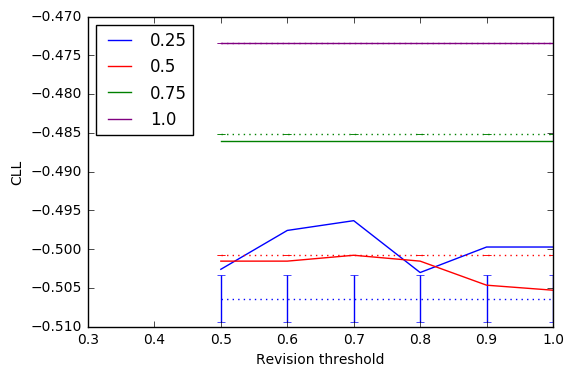

[0.014911000000000008, 0.014911000000000008, 0.014911000000000008, 0.014911000000000008, 0.014911000000000008, 0.014911000000000008]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


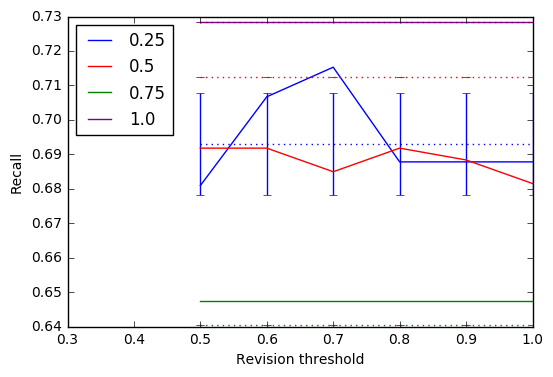

[0.00028050000000001685, 0.00028050000000001685, 0.00028050000000001685, 0.00028050000000001685, 0.00028050000000001685, 0.00028050000000001685]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


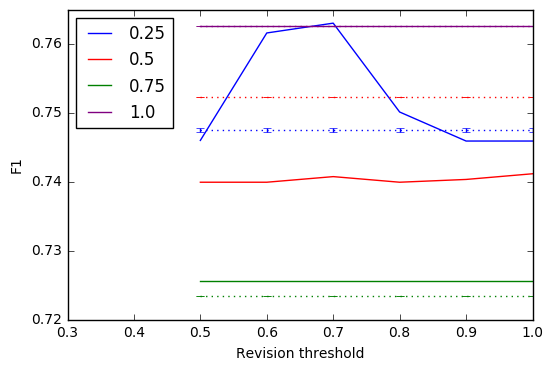

[0.01981250000000001, 0.01981250000000001, 0.01981250000000001, 0.01981250000000001, 0.01981250000000001, 0.01981250000000001]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


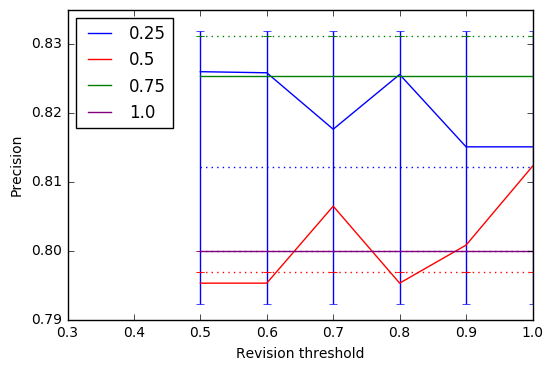

[172.7725, 172.7725, 172.7725, 172.7725, 172.7725, 172.7725]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


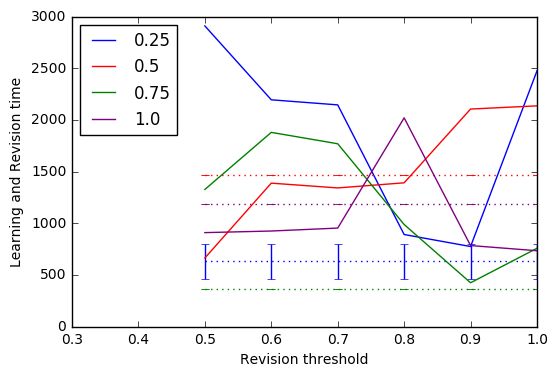

[2.6165000000000003, 2.6165000000000003, 2.6165000000000003, 2.6165000000000003, 2.6165000000000003, 2.6165000000000003]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


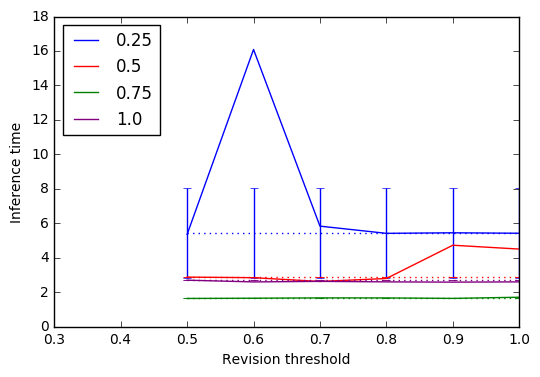

In [2]:
for dataset in ['nell']:
    display(Markdown('# Results for ' + dataset))
    for metric in ['AUC ROC', 'AUC PR', 'CLL', 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
        colors = {'0.25': 'blue', '0.5': 'red', '0.75': 'green', '1.0': 'purple'}
        for small_train_size in np.linspace(0.25, 1.0, num=smalls):
            x = []
            y = []
            if metric == 'Precision':
                base = np.array([result[metric][0] for result in data[dataset]['small'][str(small_train_size)]])
            elif metric == 'Learning and Revision time':
                base = np.array([result['Learning time'] for result in data[dataset]['small'][str(small_train_size)]])
            else:
                base = np.array([result[metric] for result in data[dataset]['small'][str(small_train_size)]])
            #print(base)
            mean = base.mean()
            mean = revisions * [mean]
            error = base.std()
            
            error = revisions * [error]
            print(error)
            for revision_threshold in np.linspace(0.5, 1.0, num=revisions):
                x.append(revision_threshold)
                if metric == 'Precision':
                    v = [result[metric][0] for result in data[dataset]['revision'][str(small_train_size)][str(revision_threshold)]]
                elif metric == 'Learning and Revision time':
                    v = [result['Revision time'] for result in data[dataset]['revision'][str(small_train_size)][str(revision_threshold)]]
                else:
                    v = [result[metric] for result in data[dataset]['revision'][str(small_train_size)][str(revision_threshold)]]
                v = np.array(v)
                y.append(v.mean())
            plt.plot(x, y, label=str(small_train_size), color=colors[str(small_train_size)])
            #plt.plot(x, mean, linestyle=':', color=colors[str(small_train_size)])
            plt.errorbar(x, mean, yerr=error, linestyle=':', color=colors[str(small_train_size)])
        plt.xlim(0.3,1.0)
        plt.xlabel('Revision threshold')
        plt.ylabel(metric)
        plt.legend(loc='upper left')
        plt.show()